In [13]:
%matplotlib inline
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as pl

#Change default font size so you don't need a magnifying glass
matplotlib.rc('font', **{'size'   : 12})

Import the CEvNS module

In [14]:
import CEvNS
#help(CEvNS.xsec_CEvNS)

We'll consider a model with a new vector mediator $Z'$, with Lagrangian,

$\mathcal{L} \supset Z_\mu' \left( g_\nu^V \overline{\nu}_L \gamma^\mu  \nu_L + g_q^V \overline{q} \gamma^\mu q \right)$

plus some other terms (from gauge-invariance) which we neglect right now.

We'll also include the contribution to $\nu-N$ scattering from a neutrino magnetic moment $\mu_\nu$.

### Differential Cross Section

Calculate and plot the differential cross-section for a fixed neutrino energy (3 MeV) and the specific model above:

Max. Ge recoil energy (E_nu = 3 MeV):  0.26468447405  keV


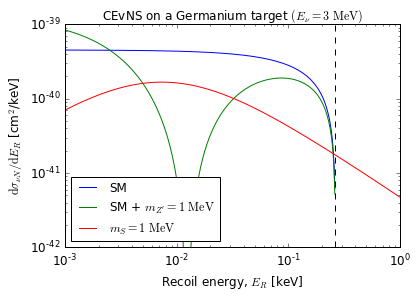

In [15]:
#Specify a single neutrino energy
E_nu = 3 #MeV

#Specify a nucleus
A_Ge = 73
Z_Ge = 32

#Calculate differential xsec
E_R = np.logspace(-3,0,500)
dsigdE = CEvNS.xsec_CEvNS(E_R, E_nu, A_Ge, Z_Ge)

#Specify New Physics parameters - Z'
m_V = 1.0 #Mediator mass, 1 MeV
gsq_V = (2e-6)**2 #(g^V_q)*(g^L_nu)

#Specify New Physics parameters - S
m_S = 1e0 #Mediator mass, 1 MeV
gsq_S = (1.5e-6)**2 #(g^S_q)*(g^S_nu)

#Calculate differential xsec including New Physics
dsigdE_vector = CEvNS.xsec_CEvNS(E_R, E_nu, A_Ge, Z_Ge, \
                             gsq_V, m_V)

dsigdE_scalar = CEvNS.xsec_scalar(E_R, E_nu, A_Ge, Z_Ge, \
                             gsq_S, m_S)

#Maximum recoil energy
Emax = CEvNS.ERmax(E_nu, A_Ge)
print "Max. Ge recoil energy (E_nu = 3 MeV): ", Emax, " keV"

#Do some plotting 
pl.figure()
pl.loglog(E_R, dsigdE, label="SM")
pl.loglog(E_R, dsigdE_vector, label=r"SM + $m_{Z'} = 1\,\, \mathrm{MeV}$")
pl.loglog(E_R, dsigdE_scalar, label=r"$m_{S} = 1\,\, \mathrm{MeV}$")

pl.axvline(Emax, color='k', linestyle='--')

pl.ylim(1e-42, 1e-39)

pl.legend(fontsize=12.0, loc="best")

pl.title(r"CEvNS on a Germanium target $(E_\nu = 3 \,\,\mathrm{MeV})$", fontsize=12)
pl.xlabel(r"Recoil energy, $E_R$ [keV]")
pl.ylabel(r"$\mathrm{d}\sigma_{\nu N}/\mathrm{d}E_R$ [cm$^2$/keV]")
pl.show()


### Recoil Rate

Calculate the recoil rate in a Germanium target, assuming a neutrino flux from the Chooz reactor.

First, let's load the neutrino flux:

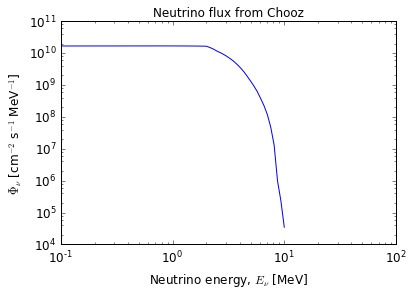

In [20]:
#Initialise neutrino_flux interpolation function, using default settings
CEvNS.loadNeutrinoFlux()

#Plot neutrino flux
E_nu = np.logspace(-1, 2,100)

pl.figure()
pl.loglog(E_nu, CEvNS.neutrino_flux_tot(E_nu))

pl.title(r"Neutrino flux from Chooz", fontsize=12)
pl.xlabel(r"Neutrino energy, $E_\nu$ [MeV]")
pl.ylabel(r"$\Phi_\nu$ [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]")
pl.show()

Now we calculate (and plot) the recoil rate:

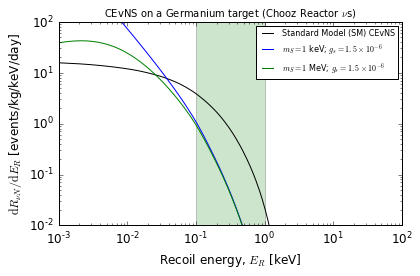

In [22]:
#Specify a nucleus
A_Ge = 73
Z_Ge = 32

weight = 1.0

#Calculate differential rate
E_R = np.logspace(-3,2,500)

#Vectorize the function differentialRate
diffRate_CEvNS = np.vectorize(CEvNS.differentialRate_CEvNS) #Vector exchange
diffRate_mag = np.vectorize(CEvNS.differentialRate_magnetic)   #Magnetic dipole
diffRate_scalar = np.vectorize(CEvNS.differentialRate_scalar)   #Scalar exchange

dRdE = diffRate_CEvNS(E_R, A_Ge, Z_Ge)

#Specify New Physics parameters
m_med = 1e0 #Mediator mass, 1 MeV
gsq = 5e-12 #(g^V_q)*(g^L_nu)
mu_nu = 3.2e-11 #Neutrino magnetic moment in units of mu_B

#Specify New Physics parameters - S
m_S = 1e0 #Mediator mass, 1 MeV
Q_S = 1e-9

#Calculate differential rate including New Physics
dRdE_heavyZ = weight*diffRate_CEvNS(E_R, A_Ge, Z_Ge, 1e9*gsq, 100.0e3)
dRdE_lightZ = weight*diffRate_CEvNS(E_R, A_Ge, Z_Ge, gsq, 1.0)
dRdE_mag = weight*diffRate_mag(E_R, A_Ge, Z_Ge, mu_nu)
dRdE_scalar = weight*diffRate_scalar(E_R, A_Ge, Z_Ge, Q_S, m_S)

#Do some plotting
pl.figure(figsize=(6,4))

pl.fill_between(np.linspace(0.1,1), 1e-2, 1e2, alpha=0.2, facecolor='green')

interactions = ["SM","scalar"]

if ("SM" in interactions):
    pl.loglog(E_R, dRdE,'k',label="Standard Model (SM) CEvNS")

if ("magnetic" in interactions):
    pl.loglog(E_R, diffRate_mag(E_R, A_Ge, Z_Ge, 2.2e-12), label=r"$\mu_\nu = 2.2\times10^{-12}\,\mu_B$")
    pl.loglog(E_R, diffRate_mag(E_R, A_Ge, Z_Ge, 2.9e-11), label=r"$\mu_\nu = 2.9\times10^{-11}\,\mu_B$")
    pl.loglog(E_R, diffRate_mag(E_R, A_Ge, Z_Ge, 1.0e-10), label=r"$\mu_\nu = 1.0\times10^{-10}\, \mu_B$")
    pl.loglog(E_R, diffRate_mag(E_R, A_Ge, Z_Ge, 1.0e-9), label=r"$\mu_\nu = 1.0\times10^{-9}\, \mu_B$")

if ("scalar" in interactions):
    pl.loglog(E_R, diffRate_scalar(E_R, A_Ge, Z_Ge, (1.5e-6)**2, 1e-3),label=r"$m_S = 1$ keV; $g_s = 1.5 \times 10^{-6}$")
    pl.loglog(E_R, diffRate_scalar(E_R, A_Ge, Z_Ge, (1.5e-6)**2, 1e0),label=r"$m_S = 1$ MeV; $g_s = 1.5 \times 10^{-6}$")
    #pl.loglog(E_R, diffRate_scalar(E_R, A_Ge, Z_Ge, 1e-9, 1), label=r"$m_S = 1$ MeV; $Q_S = 10^{-9}$")
    #pl.loglog(E_R, diffRate_scalar(E_R, A_Ge, Z_Ge, 1e-8, 5),label=r"$m_S = 5$ MeV; $Q_S = 10^{-8}$")
    #pl.loglog(E_R, diffRate_scalar(E_R, A_Ge, Z_Ge, 5e-4, 1e3), label=r"$m_S = 1$ GeV; $Q_S = 5\times10^{-4}$")
    #pl.loglog(E_R, diffRate_mag(E_R, A_Ge, Z_Ge, 2.9e-11), label=r"$\mu_\nu = 2.9\times10^{-11} \mu_B$")
    
if ("Zprime" in interactions or "vector" in interactions):
    pl.loglog(E_R, diffRate_CEvNS(E_R, A_Ge, Z_Ge, 1e-11, 1e-2), 'm-',label=r"+ $m_{Z'} = 10$ keV; $Q_{Z'} = 10^{-11}$")
    pl.loglog(E_R, diffRate_CEvNS(E_R, A_Ge, Z_Ge, 1e-10, 1e-2), 'm--',dashes=(5, 2),label=r"+ $m_{Z'} = 10$ keV; $Q_{Z'} = 10^{-10}$")
    
    pl.loglog(E_R, diffRate_CEvNS(E_R, A_Ge, Z_Ge, 1e-10, 10), 'r-',label=r"+ $m_{Z'} = 10$ MeV; $Q_{Z'} = 10^{-10}$")
    pl.loglog(E_R, diffRate_CEvNS(E_R, A_Ge, Z_Ge, 1e-9, 10), 'r--',dashes=(5, 2),label=r"+ $m_{Z'} = 10$ MeV; $Q_{Z'} = 10^{-9}$")
    
    pl.loglog(E_R, diffRate_CEvNS(E_R, A_Ge, Z_Ge, 1, 1e6), 'b-',label=r"+ $m_{Z'} = 1$ TeV; $Q_{Z'} = 1$")
    pl.loglog(E_R, diffRate_CEvNS(E_R, A_Ge, Z_Ge, 4, 1e6), 'b--',dashes=(5, 2),label=r"+ $m_{Z'} = 1$ TeV; $Q_{Z'} = 4$")

    
    #pl.loglog(E_R, diffRate_CEvNS(E_R, A_Ge, Z_Ge, 1, 1e6), label=r"SM + $m_{Z'} = 1$ TeV; $Q_{Z'} = 1$")
#pl.loglog(E_R, dRdE_lightZ,'plum', label=r"SM + $m_{Z'} = 1\,\, \mathrm{MeV}$")
#pl.loglog(E_R, dRdE_heavyZ,label=r"SM + $m_{Z'} = 100\,\, \mathrm{GeV}$")
#pl.loglog(E_R, diffRate_mag(E_R, A_Ge, Z_Ge, 1.0e-10), label=r"$\mu_\nu = 1.0\times10^{-10} \mu_B$")
#pl.loglog(E_R, diffRate_mag(E_R, A_Ge, Z_Ge, 2.9e-11), label=r"$\mu_\nu = 2.9\times10^{-11} \mu_B$")

#pl.loglog(E_R, dRdE_scalar, label=r"$m_{S} = 1\,\, \mathrm{MeV}$")

pl.ylim(1e-2, 1e2)
pl.xlim(1e-3, 1e2)

pl.legend(fontsize=8.0, loc="best")

pl.title(r"CEvNS on a Germanium target (Chooz Reactor $\nu$s)", fontsize=10)
pl.xlabel(r"Recoil energy, $E_R$ [keV]")
pl.ylabel(r"$\mathrm{d}R_{\nu N}/\mathrm{d}E_R$ [events/kg/keV/day]")
pl.tight_layout()
pl.savefig("CEvNS_rate_Zprime.pdf", bbox_inches="tight")

pl.show()